In [2]:
import numpy as np
from matplotlib import pyplot
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import rc
%matplotlib inline

#use LaTeX in plots
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Method of Images
Recall that potential flow is linear. This fact is incredibly important since the principle of superposition can be applied to generate flow. When a potential flow element (e.g. source, doublet, etc.) is placed by an impenetrable wall, it generates incorrect results with the previously derived streamfunctions and velocity components. To resolve this, the same potential flow element must be placed on the opposite side of this wall. Consider a source placed at a distance $l$ from a wall, say at point $(0, l)$. Applying the method of images, we place a source of equal magnitude at a distance $l$ on the opposite side of the wall at $(0, -l)$. From here, the principle of superposition can be applied to determine any desired quantity. By the no-flow-through boundary condition, $v = 0$ because if $v \neq 0 $, fluid would flow through the wall, which is physically impossible. So the velocity component along the wall must consist of only a $u$ component.

In [35]:
#setup the grid
N = 50;                                          #number of lines in each direction
x_lower, x_upper = -5, 5                         #x limit boundaries
y_lower, y_upper = -5, 5                         #y limit boundaries
X = np.linspace(x_lower, x_upper, N)             #points along the grid in the x direction
Y = np.linspace(y_lower, y_upper, N)             #points along the grid in the y direction
X_grid, Y_grid = np.meshgrid(X, Y)               #create the grid
L = 10                                           #length of the plot
H = 10                                           #height of the plot

We will now create a `class` that calculate various parameters of a doublet. Recall that, in Cartesian coordinates, the velocity components, streamfunction, and velocity potential are
$$u = -\frac{D}{2\pi}\frac{\left(x - x_D\right)^2 - \left(y - y_D\right)^2}{\left((x - x_D)^2 + (y - y_D)^2 \right)^2}, \quad v = -\frac{D}{2\pi}\frac{2\left(x - x_D \right)\left(y - y_D \right)}{\left((x - x_D)^2 + (y - y_D)^2\right)^2}$$
$$\psi = -\frac{D}{2\pi}\frac{y - y_D}{(x - x_D)^2 + (y - y_D)^2} $$
$$\phi = \frac{D}{2\pi}\frac{x - x_D}{(x - x_D)^2 + (y - y_D)^2} $$

In [36]:
class Doublet:
    """
    Contains several functions that describe the characteristics of doublet flow.
    Has three variables (apart from self): D, x_D, y_D
    D is the doublet strength, x_D is the x coordinate of the doublet's location,
    and y_D is the y coordinate of the doublet's location
    """
    #init constructor
    def __init__(self, D, x_D, y_D):
        self.D = D
        self.x_D = x_D
        self.y_D = y_D
        
    def velocity(self, X_grid, Y_grid):
        """
        Input Parameters:
        X_grid: 2D np array of x coordinates of nodes on the meshgrid
        Y_grid: 2D np array of y coordinates of nodes on the meshgrid
        
        Output Parameters:
        u: u component of doublet velocity
        v: v component of doublet velocity
        """
        u = -self.D / (2 * math.pi) * ((X_grid - self.x_D)**2 - (Y_grid - self.y_D)**2) / \
            ((X_grid - self.x_D)**2 + (Y_grid - self.y_D)**2)**2
        v = -self.D / (2 * math.pi) * (2*(X_grid - self.x_D) * (Y_grid - self.y_D)) / \
            ((X_grid - self.x_D)**2 + (Y_grid - self.y_D)**2)**2
        return u, v
    
    def streamfunction(self, X_grid, Y_grid):
        """
        Input Parameters:
        X_grid: 2D np array of x coordinates of nodes on the meshgrid
        Y_grid: 2D np array of y coordinates of nodes on the meshgrid
        
        Output Parameters:
        ψ: 2D np array of streamfunction (ψ) on the meshgrid
        """
        ψ = -self.D / (2 * math.pi) * (Y_grid - self.y_D) / ((X_grid - self.x_D)**2 + (Y_grid - self.y_D)**2)
        return ψ
    
    def velocityPotential(self, X_grid, Y_grid):
        """
        Input Parameters:
        X_grid: 2D np array of x coordinates of nodes on the meshgrid
        Y_grid: 2D np array of y coordinates of nodes on the meshgrid
        
        Output Parameters:
        ϕ: 2D np array of velocity potential (ϕ) on the meshgrid
        """
        ϕ = self.D / (2 * math.pi) * (X_grid - self.x_D) / ((X_grid - self.x_D)**2 + (Y_grid - self.y_D)**2)
        return ϕ

## Creating an Impenetrable Wall and Example Problem
To generate a horizontal line that represents a wall, `axhline` is used. 

Example Problem: Consider a doublet at $(0, 3)$ with an impenetrable boundary at $y = 0$. Using the method of images and the principle of superposition, obtain the corresponding velocity components, streamfunction, and velocity potential. Then, plot all of these quantities in their own respective figures.

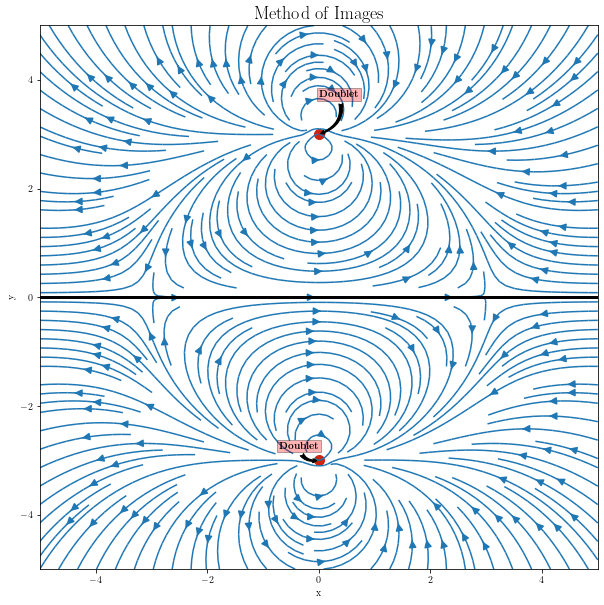

In [38]:
D = 1.0            #strength of the doublet
x_D, y_D = 0, 3.0  #coordinates of the doublet

#Create an object of the doublet at (0,3)
doublet = Doublet(D, x_D, y_D)
u_d, v_d = doublet.velocity(X_grid, Y_grid)
ψ_d = doublet.streamfunction(X_grid, Y_grid)
ϕ_d = doublet.velocityPotential(X_grid, Y_grid)

#Create an object of the image doublet at (0, -3)
doublet_image = Doublet(D, x_D, -y_D)
u_i, v_i = doublet_image.velocity(X_grid, Y_grid)
ψ_i = doublet_image.streamfunction(X_grid, Y_grid)
ϕ_i = doublet_image.velocityPotential(X_grid, Y_grid)

#Apply superposition
u = u_d + u_i
v = v_d + v_i
ψ = ψ_d + ψ_i
ϕ = ϕ_d + ϕ_i

plt.figure(figsize=(L,H))
plt.xlim(x_lower, x_upper)
plt.ylim(y_lower, y_upper)
plt.xlabel(r'x')
plt.ylabel(r'y')
plt.title(r'Method of Images', fontsize=18)
plt.scatter(x_D, y_D, s=100, color='#CD2310') 
plt.scatter(x_D, -y_D, s=100, color='#CD2310')
plt.streamplot(X_grid, Y_grid, u, v, arrowsize=1.5, density = 2, linewidth = 1.5)
plt.annotate(r'\textbf{Doublet}', xy=(x_D, y_D), xytext=(20,35), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='square,pad=0.2', fc='red', alpha=0.3),
            arrowprops=dict(arrowstyle='fancy', connectionstyle='arc3,rad=-0.5', 
            color='black'));
plt.annotate(r'\textbf{Doublet}', xy=(x_D, -y_D), xytext=(-20,10), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='square,pad=0.2', fc='red', alpha=0.3),
            arrowprops=dict(arrowstyle='fancy', connectionstyle='arc3,rad=0.5', 
            color='black'));
plt.axhline(y=0, color='k', linestyle='-',linewidth=3.0);